<h1>Interconnect Initial Analysis and Work Plan</h1>

<h2>Importing Libraries and Data</h2>

In [34]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df_contract = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/contract.csv', encoding = "utf-8")
df_internet = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/internet.csv', encoding = "utf-8")
df_personal = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/personal.csv', encoding = "utf-8")
df_phone = pd.read_csv('/Users/admin/Desktop/GitHub/new_repos/interconnect/final_provider/phone.csv', encoding = "utf-8")


<h2>Contract Data</h2>

In [3]:
display(df_contract.sample(10))
df_contract.info()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
4736,3050-RLLXC,2015-06-01,No,Two year,No,Credit card (automatic),81.25,4620.4
1327,4791-QRGMF,2014-11-01,2019-10-01 00:00:00,One year,Yes,Bank transfer (automatic),99.50,5961.1
1793,4193-IBKSW,2014-02-01,No,Two year,No,Bank transfer (automatic),24.75,1769.6
4171,9025-ZRPVR,2019-01-01,2019-10-01 00:00:00,Month-to-month,Yes,Mailed check,18.95,185.6
4467,0667-NSRGI,2016-02-01,No,One year,Yes,Mailed check,69.55,3435.6
6866,0295-PPHDO,2019-11-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,95.45,95.45
5037,8943-URTMR,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,79.65,152.7
3427,9919-KNPOO,2018-05-01,No,Month-to-month,Yes,Electronic check,94.30,1948.35
5752,7480-SPLEF,2014-05-01,No,Two year,Yes,Bank transfer (automatic),26.00,1796.55
1006,9524-EGPJC,2018-06-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,90.10,1612.75


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [4]:
df_contract.rename(columns={'customerID': 'customer_id', 'BeginDate': 'begin_date', 'EndDate': 'end_date', 'Type': 'type', 'PaperlessBilling': 'paperless_billing', 'PaymentMethod': 'payment_method', 'MonthlyCharges': 'monthly_charges', 'TotalCharges': 'total_charges'}, inplace=True)

df_contract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   begin_date         7043 non-null   object 
 2   end_date           7043 non-null   object 
 3   type               7043 non-null   object 
 4   paperless_billing  7043 non-null   object 
 5   payment_method     7043 non-null   object 
 6   monthly_charges    7043 non-null   float64
 7   total_charges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [5]:
print(df_contract.duplicated().sum())
print(df_contract.duplicated(subset=['customer_id', 'begin_date']).sum())
print(df_contract.duplicated(subset=['customer_id', 'end_date']).sum())
print(df_contract.duplicated(subset=['customer_id', 'type']).sum())
print(df_contract.duplicated(subset=['customer_id', 'paperless_billing']).sum())
print(df_contract.duplicated(subset=['customer_id', 'payment_method']).sum())
print(df_contract.duplicated(subset=['customer_id', 'monthly_charges']).sum())
print(df_contract.duplicated(subset=['customer_id', 'total_charges']).sum())


0
0
0
0
0
0
0
0


begin_date
2014-02-01    366
2019-10-01    237
2019-11-01    237
2019-09-01    237
2020-01-01    233
             ... 
2020-02-01     11
2014-01-01      7
2013-10-01      3
2013-12-01      3
2013-11-01      2
Name: count, Length: 77, dtype: int64


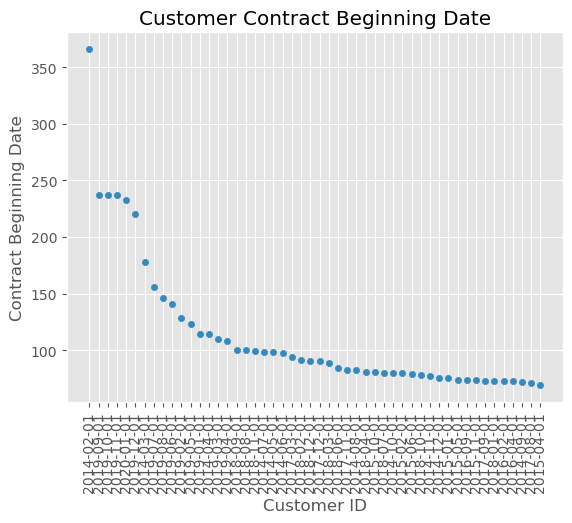

The percentage of customers that do not have end dates is 73.4630129206304 %


In [46]:
print(df_contract['begin_date'].value_counts())

df_begin = df_contract.groupby('begin_date')['customer_id'].count().sort_values(ascending=False).reset_index().rename(columns={0:'begin_date', 'customer_id':'customer_id'}).head(50)


df_begin.plot(kind='scatter',
              x='begin_date',
              y='customer_id',
              #bins=20,
              xlabel='Customer ID',
              ylabel='Contract Beginning Date',
              title='Customer Contract Beginning Date')
plt.xticks(rotation=90)
plt.show()
end_date_data = len(df_contract[df_contract['end_date'] == 'No']) / len(df_contract['end_date']) * 100
print('The percentage of customers that do not have end dates is', end_date_data, '%')

In [25]:
print(df_contract['type'].unique())
print(df_contract['payment_method'].unique())

['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [18]:
display(df_contract.sample(10))

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
2936,3352-ALMCK,2016-10-01,No,Month-to-month,Yes,Mailed check,102.65,4108.15
527,3571-DPYUH,2015-04-01,No,One year,Yes,Credit card (automatic),94.70,5430.35
4592,1897-RCFUM,2016-11-01,No,One year,Yes,Mailed check,24.20,914.6
4956,3217-FZDMN,2019-05-01,2020-01-01 00:00:00,Month-to-month,Yes,Credit card (automatic),94.45,742.95
3413,5294-DMSFH,2017-09-01,No,Month-to-month,Yes,Credit card (automatic),87.80,2621.75
5196,0786-IVLAW,2014-08-01,No,One year,No,Bank transfer (automatic),108.10,7238.6
2169,6418-PIQSP,2014-12-01,No,Two year,No,Mailed check,81.00,4985.9
657,7838-LAZFO,2016-05-01,No,One year,No,Bank transfer (automatic),78.80,3597.5
1880,6474-FVJLC,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Electronic check,86.00,165.45
2113,7607-QKKTJ,2016-05-01,No,One year,Yes,Credit card (automatic),95.00,4368.85


<h2>Analysis</h2>

The data will likely need to be up or downsampled before a model will be effective. The end date column is not going to be a good target as is, as part of it is dates and part of it is a string. I will create a new column with the end date being a "yes" or "no" value to be the actual target. One-hot encoding should be effective for the categorical features in this dataframe. 

I also added a quick graph to understand the begin date column. It looks like a lot of contracts were signed in February 2014. I am guessing that is when they started business? Then they signed a lot again at the end of 2019. The curve drops off pretty sharply though.

<h2>Internet Plan Data</h2>

In [22]:
display(df_internet.sample(10))
df_internet.info()

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
1411,2586-CWXVV,DSL,No,Yes,No,No,No,No
4802,0725-CXOTM,DSL,Yes,No,Yes,Yes,Yes,Yes
4573,7876-BEUTG,DSL,No,No,No,No,No,No
785,5879-SESNB,Fiber optic,No,No,No,No,No,No
1189,6416-YJTTB,Fiber optic,Yes,No,Yes,No,No,No
535,9565-FLVCG,DSL,Yes,Yes,No,No,No,Yes
2735,5201-FRKKS,Fiber optic,Yes,No,No,No,No,No
2691,3739-YBWAB,DSL,Yes,No,Yes,No,No,No
1583,3074-GQWYX,Fiber optic,No,No,No,No,No,No
4142,5647-FXOTP,Fiber optic,No,Yes,Yes,No,Yes,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [8]:
df_internet.rename(columns={'customerID': 'customer_id', 'InternetService': 'internet_service', 'OnlineSecurity': 'online_security', 'OnlineBackup': 'online_backup', 'DeviceProtection': 'device_protection', 'TechSupport': 'tech_support', 'StreamingTV': 'streaming_tv', 'StreamingMovies': 'streaming_movies'}, inplace=True)

df_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   customer_id        5517 non-null   object
 1   internet_service   5517 non-null   object
 2   online_security    5517 non-null   object
 3   online_backup      5517 non-null   object
 4   device_protection  5517 non-null   object
 5   tech_support       5517 non-null   object
 6   streaming_tv       5517 non-null   object
 7   streaming_movies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


In [9]:
print(df_internet.duplicated().sum())
print(df_internet.duplicated(subset=['customer_id', 'internet_service']).sum())
print(df_internet.duplicated(subset=['customer_id', 'online_security']).sum())
print(df_internet.duplicated(subset=['customer_id', 'online_backup']).sum())
print(df_internet.duplicated(subset=['customer_id', 'device_protection']).sum())
print(df_internet.duplicated(subset=['customer_id', 'tech_support']).sum())
print(df_internet.duplicated(subset=['customer_id', 'streaming_tv']).sum())
print(df_internet.duplicated(subset=['customer_id', 'streaming_movies']).sum())

0
0
0
0
0
0
0
0


In [10]:
internet_customers = len(df_internet) / len(df_contract) * 100
active_internet_customers = len(df_internet) / len(df_contract[df_contract['end_date'] == 'No']) * 100
print('The percentage of customers who have contracts who also have internet contracts is ', internet_customers, '%')
print('The percentage of customers who have active contracts who also have internet contracts is ', active_internet_customers, '%')

The percentage of customers who have contracts who also have internet contracts is  78.33309669175067 %
The percentage of customers who have active contracts who also have internet contracts is  106.6293003478933 %


In [26]:
print(df_internet['internet_service'].unique())


['DSL' 'Fiber optic']


In [23]:
display(df_internet.sample(10))

,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
1793,2754-SDJRD,Fiber optic,No,No,No,Yes,Yes,Yes
2314,2249-YPRNG,Fiber optic,No,Yes,Yes,No,Yes,Yes
5430,0032-PGELS,DSL,Yes,No,No,No,No,No
680,7408-OFWXJ,DSL,Yes,Yes,Yes,Yes,Yes,Yes
5066,5921-NGYRH,Fiber optic,Yes,No,No,No,No,No
3885,8165-CBKXO,DSL,No,Yes,Yes,No,Yes,Yes
3412,3340-QBBFM,DSL,No,No,Yes,Yes,No,No
989,5565-FILXA,Fiber optic,No,No,No,No,Yes,Yes
5142,3898-BSJYF,DSL,Yes,No,Yes,Yes,No,Yes
4759,9795-NREXC,DSL,Yes,No,Yes,Yes,Yes,Yes


<h2>Analysis</h2>

Something odd is going on with this data. I had thought that anyone who had internet service would also be an active customer, but this does not seem to line up. Further investigation will be needed in the EDA, but this could impact the machine learning model. 

One-hot encoding should be effective for the categorical features in this dataframe. Overall I will likely merge all the dataframes together once I get some clarification on what is going on with the mismatch in the services vs. active customers.

<h2>Customer Data</h2>

In [11]:
display(df_personal.sample(10))
df_personal.info()

,customerID,gender,SeniorCitizen,Partner,Dependents
548,4676-MQUEA,Male,1,Yes,No
1322,0114-RSRRW,Female,0,Yes,No
1680,5451-MHQOF,Male,0,Yes,Yes
1374,8999-YPYBV,Male,0,Yes,Yes
1712,6303-KFWSL,Female,0,No,No
5337,6705-LNMDD,Male,0,No,No
4246,5153-LXKDT,Male,0,Yes,Yes
3423,2947-DOMLJ,Male,0,No,Yes
3658,3604-WLABM,Female,0,No,No
6104,7356-AYNJP,Female,0,No,No


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [12]:
df_personal.rename(columns={'customerID': 'customer_id', 'SeniorCitizen': 'senior_citizen', 'Partner': 'partner', 'Dependents': 'dependents'}, inplace=True)

df_personal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   int64 
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


In [13]:
print(df_personal.duplicated().sum())
print(df_personal.duplicated(subset=['customer_id', 'gender']).sum())
print(df_personal.duplicated(subset=['customer_id', 'senior_citizen']).sum())
print(df_personal.duplicated(subset=['customer_id', 'partner']).sum())
print(df_personal.duplicated(subset=['customer_id', 'dependents']).sum())

0
0
0
0
0


In [21]:
display(df_personal.sample(10))

,customer_id,gender,senior_citizen,partner,dependents
1434,1571-SAVHK,Male,0,No,No
1746,3963-RYFNS,Female,0,No,No
6232,9681-OXGVC,Female,0,No,No
2768,1429-UYJSV,Female,0,No,No
241,6614-FHDBO,Male,0,No,No
2784,7295-JOMMD,Female,0,No,Yes
3195,0570-BFQHT,Female,0,No,No
2446,9492-TOKRI,Female,0,No,No
2568,2266-FUBDZ,Male,0,Yes,Yes
1582,5127-BZENZ,Female,0,Yes,Yes


<h2>Analysis</h2>

The majority of the data here is straightforward. There are as many records here as in the contracts dataframe, which is what I would expect. However, the senior citizen column is ones and zeros. Typically ones mean yes and zeros mean no, but I need to get some clarification on this before proceeding. Then I will likely create another column. This may seem redundant, but I want to do this for consistency in the dataframe. Once all the features are categorical, I will use one hot encoding on them. I will also likely merge this dataframe with the contracts dataframe.

<h2>Phone Data</h2>

In [14]:
display(df_phone.sample(10))
df_phone.info()

,customerID,MultipleLines
5019,9279-CJEOJ,Yes
2739,8084-OIVBS,No
261,8203-XJZRC,No
3989,2057-ZBLPD,Yes
4812,1941-HOSAM,No
4569,1268-ASBGA,Yes
493,8138-EALND,No
6156,9274-CNFMO,Yes
5087,6586-PSJOX,No
5717,8873-GLDMH,Yes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [15]:
df_phone.rename(columns={'customerID': 'customer_id', 'MultipleLines': 'multiple_lines'}, inplace=True)

df_phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     6361 non-null   object
 1   multiple_lines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


In [16]:
print(df_phone.duplicated().sum())

0


In [17]:
phone_customers = len(df_phone) / len(df_contract) * 100
active_phone_customers = len(df_phone) / len(df_contract[df_contract['end_date'] == 'No']) * 100
print('The percentage of customers who have contracts who also have phone contracts is ', phone_customers, '%')
print('The percentage of customers who have active contracts who also have phone contracts is ', active_phone_customers, '%')

The percentage of customers who have contracts who also have phone contracts is  90.31662643759762 %
The percentage of customers who have active contracts who also have phone contracts is  122.94163123308851 %


In [20]:
display(df_phone.sample(10))

,customer_id,multiple_lines
3125,5955-ERIHD,Yes
5246,3090-QFUVD,No
1208,6475-VHUIZ,No
5046,4397-FRLTA,No
5115,4423-JWZJN,Yes
1657,5442-PPTJY,No
3205,0378-CJKPV,Yes
5127,6047-SUHPR,No
2024,8076-FEZKJ,No
2987,9626-VFRGG,Yes


<h2>Analysis</h2>

Like with the internet data, I had thought that anyone who had phone service would also be an active customer, but this is not the case. In fact, with phone service, the discrepancy is even larger. Beyond that, the data in the dataframe itself is fairly straightforward. After gaining the necessary clarification, I will also merge this dataframe with the others. One hot encoding will also work well here for the one feature. Overall though, after the dataframes are put together, there are going to be a lot of features, and I will have to do some work to determine if everything is relevant and necessary.

<h2>Questions to Proceed</h2>

1. Is there a reason that the phone and internet files have overlap with inactive customers? Is that in error or on purpose?
2. For the senior citizen column in the "personal" file, what do the ones and zeros mean?
3. I'm thinking that total charges doesn't seem terribly relevant, especially since it will drop off for canceled customers. Is it okay to disregard it?


<h2>Work Plan</h2>

Interconnect is asking us to determine a model that will help them predict customer churn. To that end, we will take the following steps:

1. Download the data.
2. Look at data samples and information about the datasets.
3. Conduct any necessary preprocessing to clean and prepare the data for further use. (This was partially done above, but after clarifications can be completed further.)
4. Merge the datasets into one dataframe for further processing and modeling.
5. Conduct exploratory data analysis to find any trends, characteristics, and relationships relevant to making predictions for Interconnect.
6. Use feature engineering to enhance the data for creating the data model. Add new "end date" target that is clearer (not a date and a string) andd senior citizen feature that is clearer as well
7. Encode the data.
8. Split the data into test, training, and validation sets for model training and testing.
9. Scale the data as needed. (This may not be necessary since the majority of the data is categorical and will be encoded, but will explore further).
10. Start testing models. Test multiple classification models, some with gradient boosting and some without.
11. Select a model based on required metric (AUC-ROC) performance and test it against test data.
12. Provide conclusions and recommendations to Interconnect.
